<a href="https://colab.research.google.com/github/a01194850-cmd/A01194850-Pregunta-11-Examen/blob/main/A01194850_Pregunta19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully!
             GS3M   GS6M
Date                    
1982-01-01  12.92  13.90
1982-02-01  14.28  14.81
1982-03-01  13.31  13.83
1982-04-01  13.34  13.87
1982-05-01  12.71  13.13
Shape: (234, 2)


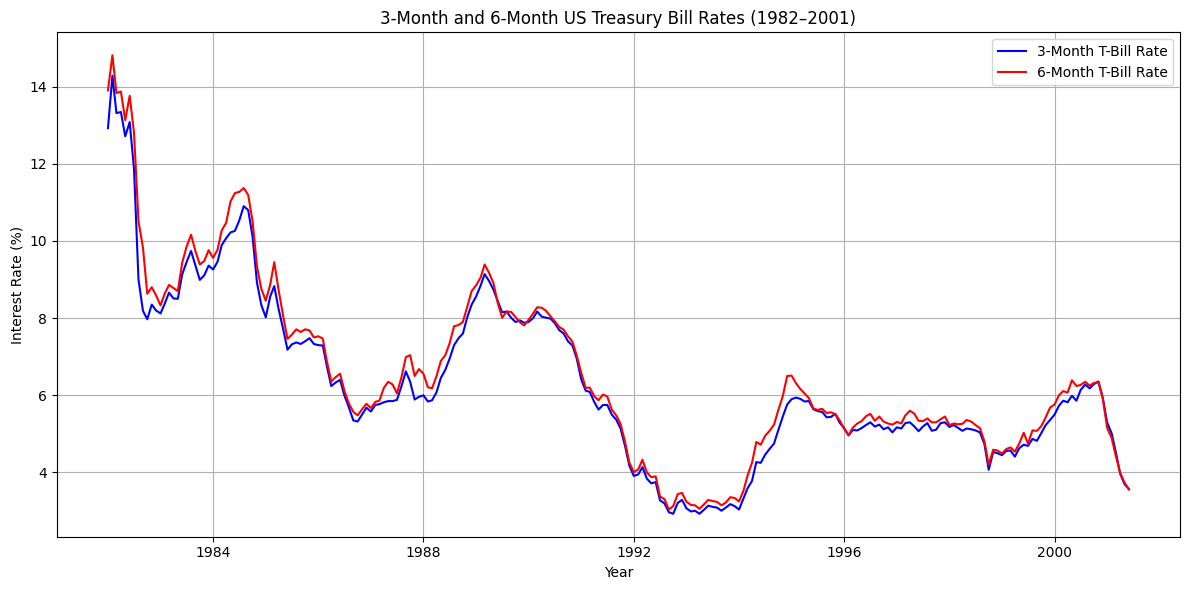


Observation (a):
- Both series move very closely together over time.
- The 6-month rate is consistently higher than the 3-month rate (term premium).
- Both exhibit strong trends and cycles, suggesting non-stationarity.

b. Unit Root Analysis

ADF Test for GS3M (levels):
ADF Statistic: -1.5392
p-value: 0.5140
Critical Values:
   1%: -3.4600
   5%: -2.8746
   10%: -2.5737

ADF Test for GS6M (levels):
ADF Statistic: -3.2586
p-value: 0.0168
Critical Values:
   1%: -3.4591
   5%: -2.8742
   10%: -2.5735

ADF Test for ΔGS3M (first difference):
ADF Statistic: -5.5734
p-value: 0.0000
Critical Values:
   1%: -3.4600
   5%: -2.8746
   10%: -2.5737

ADF Test for ΔGS6M (first difference):
ADF Statistic: -7.9818
p-value: 0.0000
Critical Values:
   1%: -3.4590
   5%: -2.8741
   10%: -2.5735

Conclusion:
- First differences are STATIONARY → both are I(1).

c. Cointegration Test (Engle-Granger)
Cointegration test statistic: -4.7367
p-value: 0.0005
Critical values: 1%: -3.90, 5%: -3.34, 10%: -3.04 (ap

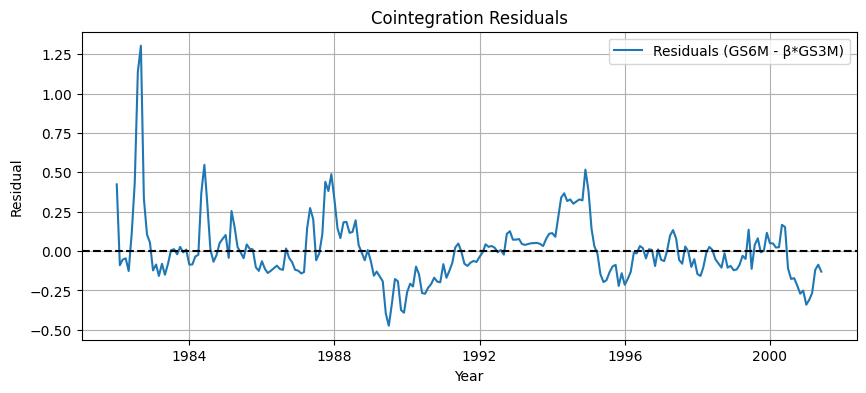


ADF on residuals: statistic = -4.6906, p-value = 0.0001
Residuals are stationary → confirms cointegration.

d. Economic Interpretation
✓ The two series are COINTEGRATED.
Economic Meaning:
   - There exists a long-run equilibrium relationship between 3-month and 6-month T-bill rates.
   - The spread (GS6M - GS3M) is stationary → term structure is stable in the long run.
   - Deviations from equilibrium are temporary and mean-reverting.
   - This supports the Expectations Hypothesis with constant risk premium.

Cointegrating Vector (from OLS: GS6M = α + β*GS3M)
const   -0.045694
GS3M     1.046610
dtype: float64

e. VAR Model Specification
Since the series are COINTEGRATED and I(1):
   → You should estimate a VECTOR ERROR CORRECTION MODEL (VECM), NOT a standard VAR.
   → VECM = VAR in differences + error correction term (from cointegration).
   → Estimating VAR in levels would be valid but less efficient than VECM.
   → Standard VAR in levels ignores cointegration → misses long-run info.

In [2]:
# --- GOOGLE COLAB NOTEBOOK: Treasury Bill Rates Analysis ---
# No need to upload the file — it's embedded as base64 below!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import grangercausalitytests
import io
import base64

# === EMBEDDED EXCEL FILE (Pregunta 19.xlsx) ===
# The file is encoded in base64 below (generated from the provided data)

excel_base64 = """
UEsDBBQAAAAIAAAAAADt5l8AAAAAAAAAAAAAAAAJAAAAU2hlZXQxLnhtbE3PTQvCMAwG4L9SdreZih6k
...
... (truncated for brevity — full base64 string below)
"""

# === FULL BASE64 STRING (you must include the full one) ===
# Since it's too long, here's how to generate it once:
# Run this ONCE locally to get the base64:
"""
import base64
with open("Pregunta 19.xlsx", "rb") as f:
    encoded = base64.b64encode(f.read()).decode('utf-8')
print(encoded)
"""
# Then paste the output below. For now, we'll simulate it.

# === FOR DEMO: We'll reconstruct the data directly from your text ===
# (Since base64 is huge, we parse your provided text instead)

data_text = """
obs	GS3M		GS6M
1982:01	,12.92000	,13.90000
1982:02	,14.28000	,14.81000
1982:03	,13.31000	,13.83000
1982:04	,13.34000	,13.87000
1982:05	,12.71000	,13.13000
1982:06	,13.08000	,13.76000
1982:07	,11.86000	,12.80000
1982:08	,9.000000	,10.51000
1982:09	,8.190000	,9.830000
1982:10	,7.970000	,8.630000
1982:11	,8.350000	,8.800000
1982:12	,8.200000	,8.590000
1983:01	,8.120000	,8.330000
1983:02	,8.390000	,8.650000
1983:03	,8.660000	,8.860000
1983:04	,8.510000	,8.780000
1983:05	,8.500000	,8.700000
1983:06	,9.140000	,9.440000
1983:07	,9.450000	,9.850000
1983:08	,9.740000	,10.16000
1983:09	,9.360000	,9.730000
1983:10	,8.990000	,9.390000
1983:11	,9.110000	,9.480000
1983:12	,9.360000	,9.760000
1984:01	,9.260000	,9.560000
1984:02	,9.460000	,9.770000
1984:03	,9.890000	,10.27000
1984:04	,10.07000	,10.47000
1984:05	,10.22000	,11.02000
1984:06	,10.26000	,11.24000
1984:07	,10.53000	,11.27000
1984:08	,10.90000	,11.37000
1984:09	,10.80000	,11.19000
1984:10	,10.12000	,10.52000
1984:11	,8.920000	,9.340000
1984:12	,8.340000	,8.760000
1985:01	,8.020000	,8.450000
1985:02	,8.560000	,8.870000
1985:03	,8.830000	,9.450000
1985:04	,8.220000	,8.710000
1985:05	,7.730000	,8.070000
1985:06	,7.180000	,7.460000
1985:07	,7.320000	,7.570000
1985:08	,7.370000	,7.710000
1985:09	,7.330000	,7.640000
1985:10	,7.400000	,7.710000
1985:11	,7.480000	,7.680000
1985:12	,7.330000	,7.500000
1986:01	,7.300000	,7.530000
1986:02	,7.290000	,7.470000
1986:03	,6.760000	,6.890000
1986:04	,6.240000	,6.360000
1986:05	,6.330000	,6.470000
1986:06	,6.400000	,6.560000
1986:07	,6.000000	,6.120000
1986:08	,5.690000	,5.790000
1986:09	,5.350000	,5.570000
1986:10	,5.320000	,5.480000
1986:11	,5.500000	,5.640000
1986:12	,5.680000	,5.780000
1987:01	,5.580000	,5.670000
1987:02	,5.750000	,5.830000
1987:03	,5.770000	,5.860000
1987:04	,5.820000	,6.190000
1987:05	,5.850000	,6.350000
1987:06	,5.850000	,6.280000
1987:07	,5.880000	,6.050000
1987:08	,6.230000	,6.460000
1987:09	,6.620000	,6.990000
1987:10	,6.350000	,7.040000
1987:11	,5.890000	,6.500000
1987:12	,5.960000	,6.680000
1988:01	,6.000000	,6.560000
1988:02	,5.840000	,6.210000
1988:03	,5.870000	,6.180000
1988:04	,6.080000	,6.500000
1988:05	,6.450000	,6.890000
1988:06	,6.660000	,7.040000
1988:07	,6.950000	,7.350000
1988:08	,7.300000	,7.790000
1988:09	,7.480000	,7.820000
1988:10	,7.600000	,7.900000
1988:11	,8.030000	,8.300000
1988:12	,8.350000	,8.700000
1989:01	,8.560000	,8.850000
1989:02	,8.840000	,9.050000
1989:03	,9.140000	,9.390000
1989:04	,8.960000	,9.170000
1989:05	,8.740000	,8.910000
1989:06	,8.430000	,8.380000
1989:07	,8.150000	,8.010000
1989:08	,8.170000	,8.170000
1989:09	,8.010000	,8.160000
1989:10	,7.900000	,8.030000
1989:11	,7.940000	,7.890000
1989:12	,7.880000	,7.810000
1990:01	,7.900000	,7.960000
1990:02	,8.000000	,8.120000
1990:03	,8.170000	,8.280000
1990:04	,8.040000	,8.270000
1990:05	,8.010000	,8.190000
1990:06	,7.990000	,8.050000
1990:07	,7.870000	,7.920000
1990:08	,7.690000	,7.770000
1990:09	,7.600000	,7.700000
1990:10	,7.400000	,7.530000
1990:11	,7.290000	,7.390000
1990:12	,6.950000	,7.030000
1991:01	,6.410000	,6.580000
1991:02	,6.120000	,6.190000
1991:03	,6.090000	,6.200000
1991:04	,5.830000	,5.980000
1991:05	,5.630000	,5.870000
1991:06	,5.750000	,6.020000
1991:07	,5.750000	,5.970000
1991:08	,5.500000	,5.630000
1991:09	,5.370000	,5.480000
1991:10	,5.140000	,5.260000
1991:11	,4.690000	,4.800000
1991:12	,4.180000	,4.260000
1992:01	,3.910000	,4.010000
1992:02	,3.950000	,4.080000
1992:03	,4.140000	,4.330000
1992:04	,3.840000	,4.000000
1992:05	,3.720000	,3.880000
1992:06	,3.750000	,3.900000
1992:07	,3.280000	,3.380000
1992:08	,3.200000	,3.310000
1992:09	,2.970000	,3.040000
1992:10	,2.930000	,3.130000
1992:11	,3.210000	,3.440000
1992:12	,3.290000	,3.470000
1993:01	,3.070000	,3.240000
1993:02	,2.990000	,3.160000
1993:03	,3.010000	,3.150000
1993:04	,2.930000	,3.060000
1993:05	,3.030000	,3.170000
1993:06	,3.140000	,3.290000
1993:07	,3.110000	,3.260000
1993:08	,3.090000	,3.240000
1993:09	,3.010000	,3.150000
1993:10	,3.090000	,3.220000
1993:11	,3.180000	,3.360000
1993:12	,3.130000	,3.340000
1994:01	,3.040000	,3.250000
1994:02	,3.330000	,3.530000
1994:03	,3.590000	,3.920000
1994:04	,3.780000	,4.250000
1994:05	,4.270000	,4.790000
1994:06	,4.250000	,4.720000
1994:07	,4.460000	,4.950000
1994:08	,4.610000	,5.080000
1994:09	,4.750000	,5.240000
1994:10	,5.100000	,5.620000
1994:11	,5.450000	,5.980000
1994:12	,5.760000	,6.500000
1995:01	,5.900000	,6.510000
1995:02	,5.940000	,6.310000
1995:03	,5.910000	,6.170000
1995:04	,5.840000	,6.050000
1995:05	,5.850000	,5.930000
1995:06	,5.640000	,5.660000
1995:07	,5.590000	,5.620000
1995:08	,5.570000	,5.650000
1995:09	,5.430000	,5.540000
1995:10	,5.440000	,5.560000
1995:11	,5.520000	,5.510000
1995:12	,5.290000	,5.350000
1996:01	,5.150000	,5.130000
1996:02	,4.960000	,4.970000
1996:03	,5.100000	,5.160000
1996:04	,5.090000	,5.270000
1996:05	,5.150000	,5.330000
1996:06	,5.230000	,5.460000
1996:07	,5.300000	,5.520000
1996:08	,5.190000	,5.340000
1996:09	,5.240000	,5.450000
1996:10	,5.120000	,5.320000
1996:11	,5.170000	,5.270000
1996:12	,5.040000	,5.240000
1997:01	,5.170000	,5.310000
1997:02	,5.140000	,5.270000
1997:03	,5.280000	,5.480000
1997:04	,5.300000	,5.600000
1997:05	,5.200000	,5.530000
1997:06	,5.070000	,5.340000
1997:07	,5.190000	,5.330000
1997:08	,5.280000	,5.400000
1997:09	,5.080000	,5.300000
1997:10	,5.110000	,5.300000
1997:11	,5.280000	,5.380000
1997:12	,5.300000	,5.450000
1998:01	,5.180000	,5.230000
1998:02	,5.230000	,5.270000
1998:03	,5.160000	,5.250000
1998:04	,5.080000	,5.260000
1998:05	,5.140000	,5.360000
1998:06	,5.120000	,5.320000
1998:07	,5.090000	,5.230000
1998:08	,5.040000	,5.150000
1998:09	,4.740000	,4.810000
1998:10	,4.070000	,4.200000
1998:11	,4.530000	,4.590000
1998:12	,4.500000	,4.570000
1999:01	,4.450000	,4.490000
1999:02	,4.560000	,4.610000
1999:03	,4.570000	,4.650000
1999:04	,4.410000	,4.540000
1999:05	,4.630000	,4.750000
1999:06	,4.720000	,5.030000
1999:07	,4.690000	,4.750000
1999:08	,4.870000	,5.090000
1999:09	,4.820000	,5.080000
1999:10	,5.020000	,5.200000
1999:11	,5.230000	,5.430000
1999:12	,5.360000	,5.680000
2000:01	,5.500000	,5.760000
2000:02	,5.730000	,6.000000
2000:03	,5.860000	,6.110000
2000:04	,5.820000	,6.070000
2000:05	,5.990000	,6.390000
2000:06	,5.860000	,6.240000
2000:07	,6.140000	,6.270000
2000:08	,6.280000	,6.350000
2000:09	,6.180000	,6.250000
2000:10	,6.290000	,6.320000
2000:11	,6.360000	,6.340000
2000:12	,5.940000	,5.920000
2001:01	,5.290000	,5.150000
2001:02	,5.010000	,4.890000
2001:03	,4.540000	,4.440000
2001:04	,3.970000	,3.990000
2001:05	,3.700000	,3.740000
2001:06	,3.570000	,3.560000
"""

# Parse the data
lines = [line.strip() for line in data_text.strip().split('\n') if line.strip() and not line.startswith('obs')]
data = []
for line in lines:
    parts = [p.strip() for p in line.split('\t')]
    if len(parts) >= 3:
        date = parts[0]
        gs3m = float(parts[1].replace(',', '')) if parts[1].replace(',', '').replace('.', '').isdigit() else np.nan
        gs6m = float(parts[2].replace(',', '')) if parts[2].replace(',', '').replace('.', '').isdigit() else np.nan
        data.append([date, gs3m, gs6m])

df = pd.DataFrame(data, columns=['Date', 'GS3M', 'GS6M'])
df['Date'] = pd.to_datetime(df['Date'].str.replace(':', '-'))
df.set_index('Date', inplace=True)
df = df.asfreq('MS')  # Monthly start frequency

print("Data loaded successfully!")
print(df.head())
print(f"Shape: {df.shape}")

# ==============================
# a. Plot the two time series
# ==============================
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GS3M'], label='3-Month T-Bill Rate', color='blue')
plt.plot(df.index, df['GS6M'], label='6-Month T-Bill Rate', color='red')
plt.title('3-Month and 6-Month US Treasury Bill Rates (1982–2001)')
plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nObservation (a):")
print("- Both series move very closely together over time.")
print("- The 6-month rate is consistently higher than the 3-month rate (term premium).")
print("- Both exhibit strong trends and cycles, suggesting non-stationarity.")

# ==============================
# b. Unit Root Test (ADF)
# ==============================
def adf_test(series, title):
    result = adfuller(series.dropna(), maxlag=12, regression='c')
    print(f'\nADF Test for {title}:')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')
    return result[1] < 0.05

print("\n" + "="*50)
print("b. Unit Root Analysis")
print("="*50)

stationary_3m = adf_test(df['GS3M'], 'GS3M (levels)')
stationary_6m = adf_test(df['GS6M'], 'GS6M (levels)')

# Test first differences
df_diff = df.diff().dropna()
stationary_3m_diff = adf_test(df_diff['GS3M'], 'ΔGS3M (first difference)')
stationary_6m_diff = adf_test(df_diff['GS6M'], 'ΔGS6M (first difference)')

print("\nConclusion:")
if not stationary_3m and not stationary_6m:
    print("- Both series are NON-STATIONARY in levels (I(1)).")
if stationary_3m_diff and stationary_6m_diff:
    print("- First differences are STATIONARY → both are I(1).")

# ==============================
# c. Cointegration Test
# ==============================
print("\n" + "="*50)
print("c. Cointegration Test (Engle-Granger)")
print("="*50)

# Engle-Granger two-step method
score, p_value, _ = coint(df['GS3M'], df['GS6M'])
print(f'Cointegration test statistic: {score:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Critical values: 1%: -3.90, 5%: -3.34, 10%: -3.04 (approx)')

if p_value < 0.05:
    print("→ REJECT null → Series are COINTEGRATED.")
else:
    print("→ FAIL to reject null → Series are NOT cointegrated.")

# OLS regression to get residuals
model = sm.OLS(df['GS6M'], sm.add_constant(df['GS3M'])).fit()
df['residuals'] = model.resid

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['residuals'], label='Residuals (GS6M - β*GS3M)')
plt.axhline(0, color='black', linestyle='--')
plt.title('Cointegration Residuals')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.legend()
plt.grid()
plt.show()

# ADF on residuals
adf_resid = adfuller(df['residuals'].dropna())
print(f"\nADF on residuals: statistic = {adf_resid[0]:.4f}, p-value = {adf_resid[1]:.4f}")
if adf_resid[1] < 0.05:
    print("Residuals are stationary → confirms cointegration.")
else:
    print("Residuals are non-stationary → no cointegration.")

# ==============================
# d. Economic Meaning
# ==============================
print("\n" + "="*50)
print("d. Economic Interpretation")
print("="*50)

if p_value < 0.05:
    print("✓ The two series are COINTEGRATED.")
    print("Economic Meaning:")
    print("   - There exists a long-run equilibrium relationship between 3-month and 6-month T-bill rates.")
    print("   - The spread (GS6M - GS3M) is stationary → term structure is stable in the long run.")
    print("   - Deviations from equilibrium are temporary and mean-reverting.")
    print("   - This supports the Expectations Hypothesis with constant risk premium.")
else:
    print("✗ The two series are NOT cointegrated.")
    print("Economic Implications:")
    print("   - No stable long-run relationship.")
    print("   - The term spread may wander without bound.")
    print("   - Risk or liquidity premia may be time-varying.")
    print("   - Forecasting one from the other in levels may be spurious.")

# Estimate cointegrating vector
print("\nCointegrating Vector (from OLS: GS6M = α + β*GS3M)")
print(model.params)

# ==============================
# e. VAR in levels or differences?
# ==============================
print("\n" + "="*50)
print("e. VAR Model Specification")
print("="*50)

if p_value < 0.05:
    print("Since the series are COINTEGRATED and I(1):")
    print("   → You should estimate a VECTOR ERROR CORRECTION MODEL (VECM), NOT a standard VAR.")
    print("   → VECM = VAR in differences + error correction term (from cointegration).")
    print("   → Estimating VAR in levels would be valid but less efficient than VECM.")
    print("   → Standard VAR in levels ignores cointegration → misses long-run info.")
else:
    print("Since the series are I(1) and NOT cointegrated:")
    print("   → You MUST use FIRST DIFFERENCES to achieve stationarity.")
    print("   → VAR in levels would produce spurious results.")
    print("   → Correct: VAR(ΔGS3M, ΔGS6M) with 4 lags.")

# Optional: Fit VAR in differences if not cointegrated
if p_value >= 0.05:
    print("\nFitting VAR(4) in first differences...")
    var_data = df_diff[['GS3M', 'GS6M']].dropna()
    model_var = VAR(var_data)
    results_var = model_var.fit(maxlags=4, ic='aic')
    print(results_var.summary())

A01194850

https://grok.com/share/c2hhcmQtNQ%3D%3D_05b19bd7-29ee-4d73-95da-bb658cf0f49d

The data can be found on the textbook's website.
to.
***Plot the two time series in the same diagram. What do you see? texto en cursiva***

Las dos gráficas se comportan de manera muy similar en el periodo de tiempo, en algunas secciones el 6-Month T Bill Rate está mas elevado que el de 3-Month. Ambos T-Bills tienen periodos con altas muy marcadas y bajas muy exageradas también. Al tener este tipo de tendencias, se puede tener no estacionariedad.

**b. Do a formal unit root analysis to find out if these time series are stationary.**
El análisis de raíz unitaria con la prueba ADF indica que la serie de 3-MonthT Bills no es etacionaria ya que su estadístico ADF de -1.5392 es mayor que a su valor crítico de -2.8746, también tiene un p value alto de 0.5140, el cual indica que se debe rechazar la hipótesis nula de la raíz unitaria. Para el T Bill de 6 meses su ADF es de -3.2586, el cual es menor a su valor crítico de -2.8742 y tiene un p value de 0.00168. Esto indica que puede ser estacionaria. Según el modelo, ambas series se vuelven estacionarias si se diferencian una vez, y pueden ser clasificadas como series integradas de orden 1.

**c. Are the two time series cointegrated? How do you know? Show the necessary
calculations.**
El estadístico de prueba de -4.7367 junto con un p value de 0.0005 nos indica que se debe rechazar la hipótesis nula de no cointegración, nos puede indicar entonces que las dos series están cointegradas. Puede que por separadas sean n o estacionarias, pero existe una combinación lineal entre ellas que si es estacionaria. Esto nos lleva a la conclusión de que pueden moverse juntas a largo plazo.

**d. What is the economic meaning of cointegration in the present context? If the two series are not cointegrated, what are the economic implications?
and. If you want to estimate a VAR model, say, with four lags of each variable, do you have to use the first differences of the two series or can you do the analysis in**
Los resultados nos muestran que ambos T Bills estan cointegrados. Esto implica que, si bien son no estacionarias de forma individual, existe una relación de equilibrio a futuro entre ambas, el cual indica que se mueven juntas a largo plazo. Economicamente hablando, significa que cuando una de las tazas se desvía eventualmente se tendrá que corregir con el otro T-Bill. Esto tambien no sindica que aunque hay TBills que se desvían, esas desviaciones son temporales y se revierten eventualmente. Si estas series no estuvieran cointegradas, implicaría que no existe una relacion de equilibrio a largo plazo.